# Income Classification                                                                       

###   Group no.29

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

## 1.Data Collection and Cleaning

### Load The Data 

In [2]:
# Loading csv data [DataSets/adult.csv] in dataframe.
df = pd.read_csv('../Dataset/adult.csv')

# For loading Excel data
# df = pd.read_excel('../DataSets/adult.xlxs')

# For loading txt data
# df = pd.read_csv('../DataSets/adult.txt', delimiter = '<seperator-used>')

### Describe the data in multiple way

In [3]:
# it is used to describe statistical analysis of data
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# Using .head(n) method to view the top n rows in dataframe. default value of n is 5.
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Using .tail() to view the trailing rows to the last of the dataframe. default is 5.
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# get summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Remove Insignificants column

In [7]:

#  The non-significant columns in this dataframe are:
# 1. fnlwgt[2]: Final Weight of an individual
# 2. relationship[3]: relationship status
# 3. education[7]: The college details are ambiguous, irrelaative to the context and kept secret.

In [8]:

# Using drop to remove insignificant columns.

# Passing the columnName directly in label.
df_modified = df.drop(labels = ['fnlwgt', 'relationship', 'education'], axis = 'columns')
df_modified.head(3)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K


In [9]:
# axis = 1 for column and 0 for row
df_modified1 = df.drop(labels= ['fnlwgt', 'relationship', 'education'], axis = 1)
df_modified1.head(3)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K


In [10]:
# labels can be directly passed as columns and no axis need to be specified.

df_modified3 = df.drop(columns = ['fnlwgt', 'relationship', 'education'])
df_modified3.head(3)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K


In [11]:
# The dataFrame can be modified inplace 

df.drop(columns = ['fnlwgt', 'relationship', 'education'], inplace = True)
df.head(3)

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K


## Check Missing value for each columns

In [12]:

# Check for missing data in each column using isnull
df.isnull()

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:

# Since this dat can be large set of True- False so use sum in each column.
df.isnull().sum()

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Remove rows with missing values

In [14]:
# The dataframe contains '?' as missing values so replacing them with nan

df.replace(to_replace = '?', value = np.nan)
df.replace(to_replace = '?', value = np.nan, inplace = True)
df.iloc[4]

age                           18
workclass                    NaN
educational-num               10
marital-status     Never-married
occupation                   NaN
race                       White
gender                    Female
capital-gain                   0
capital-loss                   0
hours-per-week                30
native-country     United-States
income                     <=50K
Name: 4, dtype: object

In [15]:

# Check if data is clean
df.isnull().sum()

age                   0
workclass          2799
educational-num       0
marital-status        0
occupation         2809
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [16]:
df.fillna(np.nan)
df_dropped = df.dropna()
df_dropped

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,3103,0,32,United-States,>50K
8,24,Private,10,Never-married,Other-service,White,Female,0,0,40,United-States,<=50K
9,55,Private,4,Married-civ-spouse,Craft-repair,White,Male,0,0,10,United-States,<=50K
10,65,Private,9,Married-civ-spouse,Machine-op-inspct,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,13,Married-civ-spouse,Adm-clerical,White,Male,0,0,40,United-States,<=50K


In [17]:

print(len(df_dropped))

45222


### Formatting your Data – making data types compaitable with other data types

In [18]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 12 columns):
age                45222 non-null int64
workclass          45222 non-null object
educational-num    45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


In [19]:
# Check if data is clean
df_dropped.isnull().sum()

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [20]:
# Creating anothter checkpoint

df_modified = df_dropped
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 12 columns):
age                45222 non-null int64
workclass          45222 non-null object
educational-num    45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


In [21]:
df_modified.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K


In [22]:
df_modified1 = df_modified.copy()
# df_formatted = df_modified[['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']].astype(float)
# df_modified1['hours-per-week1'] = df_modified1['hours-per-week'].astype(float)
# del df_modified1['hours-per-week1']

In [23]:

df_modified1.loc[df_modified1['income'] == '<=50K', 'income'] = 0
df_modified1.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,0


In [24]:
df_modified1.loc[df_modified1['income'] == '>50K', 'income'] = 1
df_modified1.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,0


In [25]:

df_modified1['education-num'] = df_modified1['educational-num']
del df_modified1['educational-num']
df_modified1

,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0,7
1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0,9
2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1,12
3,44,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1,10
5,34,Private,Never-married,Other-service,White,Male,0,0,30,United-States,0,6
7,63,Self-emp-not-inc,Married-civ-spouse,Prof-specialty,White,Male,3103,0,32,United-States,1,15
8,24,Private,Never-married,Other-service,White,Female,0,0,40,United-States,0,10
9,55,Private,Married-civ-spouse,Craft-repair,White,Male,0,0,10,United-States,0,4
10,65,Private,Married-civ-spouse,Machine-op-inspct,White,Male,6418,0,40,United-States,1,9
11,36,Federal-gov,Married-civ-spouse,Adm-clerical,White,Male,0,0,40,United-States,0,13


In [26]:

df_formatted = df_modified1.copy()
# df_formatted = df_formatted[:2] + [df_formatted[6]] + df_formatted[2:5]
df_formatted.columns

Index(['age', 'workclass', 'marital-status', 'occupation', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'education-num'],
      dtype='object')

In [27]:

columns = df_formatted.columns
columns, len(columns)

(Index(['age', 'workclass', 'marital-status', 'occupation', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'income', 'education-num'],
       dtype='object'), 12)

In [28]:

df_formatted.to_csv('modified-adult-data.csv')

In [29]:

df_formatted.to_csv('modified-adult-data.txt', sep = ',')

## 2.Exploratory Data Analysis and Data Visualization

In [30]:
income_df = pd.read_csv('modified-adult-data.csv')
income_df.head(3)

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0,7
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0,9
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1,12


## 1. classify variables by their type: quantitative vs. categorical

In [31]:
income_df.describe()

,Unnamed: 0,age,capital-gain,capital-loss,hours-per-week,income,education-num
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,24433.151563,38.547941,1101.430344,88.595418,40.938017,0.247844,10.118460
std,14092.966862,13.217870,7506.430084,404.956092,12.007508,0.431766,2.552881
min,0.000000,17.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,12206.250000,28.000000,0.000000,0.000000,40.000000,0.000000,9.000000
50%,24470.000000,37.000000,0.000000,0.000000,40.000000,0.000000,10.000000
75%,36629.750000,47.000000,0.000000,0.000000,45.000000,0.000000,13.000000
max,48841.000000,90.000000,99999.000000,4356.000000,99.000000,1.000000,16.000000


In [32]:
income_df.shape

(45222, 13)

In [33]:
income_df.nunique()

Unnamed: 0        45222
age                  74
workclass             7
marital-status        7
occupation           14
race                  5
gender                2
capital-gain        121
capital-loss         97
hours-per-week       96
native-country       41
income                2
education-num        16
dtype: int64

### Categorical Data

In [34]:
categorical_data=income_df.select_dtypes(include='object')
categorical_data.head()

,workclass,marital-status,occupation,race,gender,native-country
0,Private,Never-married,Machine-op-inspct,Black,Male,United-States
1,Private,Married-civ-spouse,Farming-fishing,White,Male,United-States
2,Local-gov,Married-civ-spouse,Protective-serv,White,Male,United-States
3,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,United-States
4,Private,Never-married,Other-service,White,Male,United-States


#### WorkClass: Categorical, Discrete

In [35]:
income_df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

#### Martital Status: Categorical, Discrte

In [36]:
income_df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

#### Occupation: Categorical

In [37]:
income_df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

#### Race: Categorical

In [38]:
income_df['race'].unique()

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

#### Gender: Dicrete [M, F]

In [39]:
income_df['gender'].unique()

array(['Male', 'Female'], dtype=object)

#### Native Country : Categorical

In [40]:
income_df['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

### Continuous

#### Capital Gain and Capital Loss: Continuous

In [41]:
income_df['capital-gain'].min(), income_df['capital-gain'].max()

(0, 99999)

In [42]:
income_df['capital-loss'].min(), income_df['capital-loss'].max()

(0, 4356)

#### Hours per Week: Quantitative Continuous

In [43]:
income_df['hours-per-week'].min(), income_df['hours-per-week'].max()

(1, 99)

#### Educational Number: Continuous

In [44]:
income_df['education-num'].min(), income_df['education-num'].max()

(1, 16)

## Handle categorical variables with numerically coded values

### Income Prediction has already been numerically coded as :-

#### 0: Less than 50k

#### 1: Greater than 50k

#### Gender will be coded as:

#### 0: Female

#### 1: Male

In [45]:
income_df['gender_numeric'] = np.where(income_df['gender'] == 'Male', 1, np.where(income_df['gender'] == 'Female', 0, income_df['gender']))
income_df.head(5)

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,gender_numeric
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0,7,1
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0,9,1
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1,12,1
3,3,44,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1,10,1
4,5,34,Private,Never-married,Other-service,White,Male,0,0,30,United-States,0,6,1


In [46]:
income_df.tail(5)

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,gender_numeric
45217,48837,27,Private,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,0,12,0
45218,48838,40,Private,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,1,9,1
45219,48839,58,Private,Widowed,Adm-clerical,White,Female,0,0,40,United-States,0,9,0
45220,48840,22,Private,Never-married,Adm-clerical,White,Male,0,0,20,United-States,0,9,1
45221,48841,52,Self-emp-inc,Married-civ-spouse,Exec-managerial,White,Female,15024,0,40,United-States,1,9,0


In [47]:

del income_df['gender']

In [48]:
income_df.head(2)

,Unnamed: 0,age,workclass,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,gender_numeric
0,0,25,Private,Never-married,Machine-op-inspct,Black,0,0,40,United-States,0,7,1
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,0,0,50,United-States,0,9,1


In [49]:

income_df['marital-status'].replace(['Married-civ-spouse'], 'Married', inplace=True)
income_df['marital-status'].replace('Never-married', 'Not-married', inplace=True)
income_df['marital-status'].replace(['Divorced'], 'Separated', inplace=True)
income_df['marital-status'].replace(['Widowed'], 'Separated', inplace=True)
income_df['marital-status'].replace(['Separated'], 'Separated', inplace=True)
income_df['marital-status'].replace(['Married-spouse-absent'], 'Not-married', inplace=True)
income_df['marital-status'].replace(['Married-AF-spouse'], 'Married', inplace=True)
income_df['marital-status'].unique()

array(['Not-married', 'Married', 'Separated'], dtype=object)

In [50]:

income_df.workclass = income_df.workclass.replace({'Self-emp-not-inc': 'Self-emp',
                                        'Self-emp-inc': 'Self-emp',
                                        'Local-gov': 'Gov',
                                        'Federal-gov': 'Gov',
                                        'State-gov': 'Gov'})
income_df.workclass.unique()

array(['Private', 'Gov', 'Self-emp', 'Without-pay'], dtype=object)

In [51]:
checkpoint_1 = income_df.copy()

In [52]:
checkpoint_1.head()

,Unnamed: 0,age,workclass,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,gender_numeric
0,0,25,Private,Not-married,Machine-op-inspct,Black,0,0,40,United-States,0,7,1
1,1,38,Private,Married,Farming-fishing,White,0,0,50,United-States,0,9,1
2,2,28,Gov,Married,Protective-serv,White,0,0,40,United-States,1,12,1
3,3,44,Private,Married,Machine-op-inspct,Black,7688,0,40,United-States,1,10,1
4,5,34,Private,Not-married,Other-service,White,0,0,30,United-States,0,6,1


## Perform univariate and bivariate analysis and derive meaningful insights about the dataset

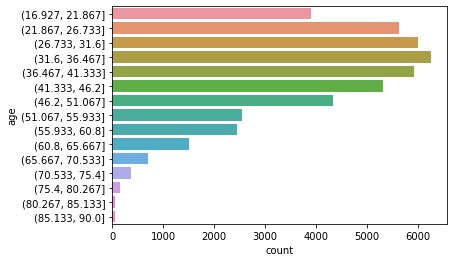

In [53]:
import seaborn as sns
temp_df = pd.DataFrame()
temp_df['age'] = pd.cut(income_df['age'], 15)
sns.countplot(y = 'age', data=temp_df)

#### It is depicted from the above analysis that the majority of people in the dataset belong to age group 20years to 40years.

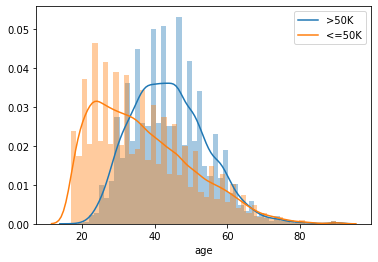

In [54]:

sns.distplot(income_df[income_df['income'] == 1]['age'], kde_kws={"label": ">50K"})
sns.distplot(income_df[income_df['income'] == 0]['age'], kde_kws={"label": "<=50K"})

#### It is shown from the above analysis that while majority of the earning class is in 20-40 years of age, the person who have income greater than 50k belong to 40+ age in ma jority

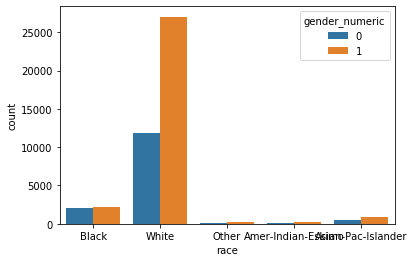

In [55]:
x, y, hue = "race", "count", "gender_numeric"

sns.countplot(x=x, hue=hue, data=income_df)

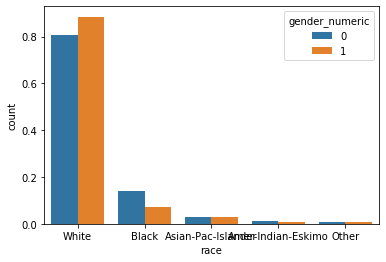

In [56]:

prop_df = (income_df[x]
           .groupby(income_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)

plt.show()

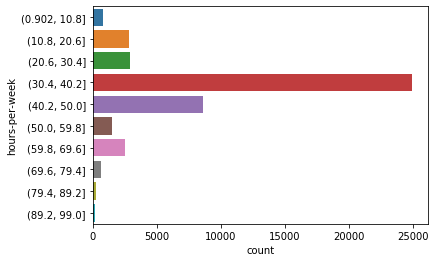

In [57]:
temp_df['hours-per-week'] = pd.cut(income_df['hours-per-week'], 10)
# suitable cut will be 10 because range is 0 to 100.

sns.countplot(y="hours-per-week", data=temp_df)

#### The above analysis shows that majority of the working class dedicates arounf 30 to 40 hours per week to their work, which can be roughly estimated to be around 8 hrs a day for 5 working days

(20, 60)

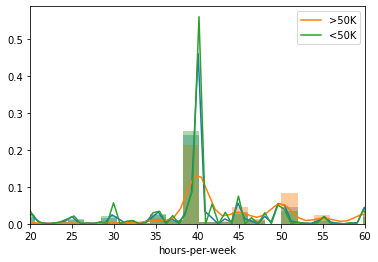

In [58]:
sns.distplot(income_df['hours-per-week']);
sns.distplot(income_df[income_df['income'] == 1]['hours-per-week'], kde_kws={"label": ">50K"})
sns.distplot(income_df[income_df['income'] == 0]['hours-per-week'], kde_kws={"label": "<50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


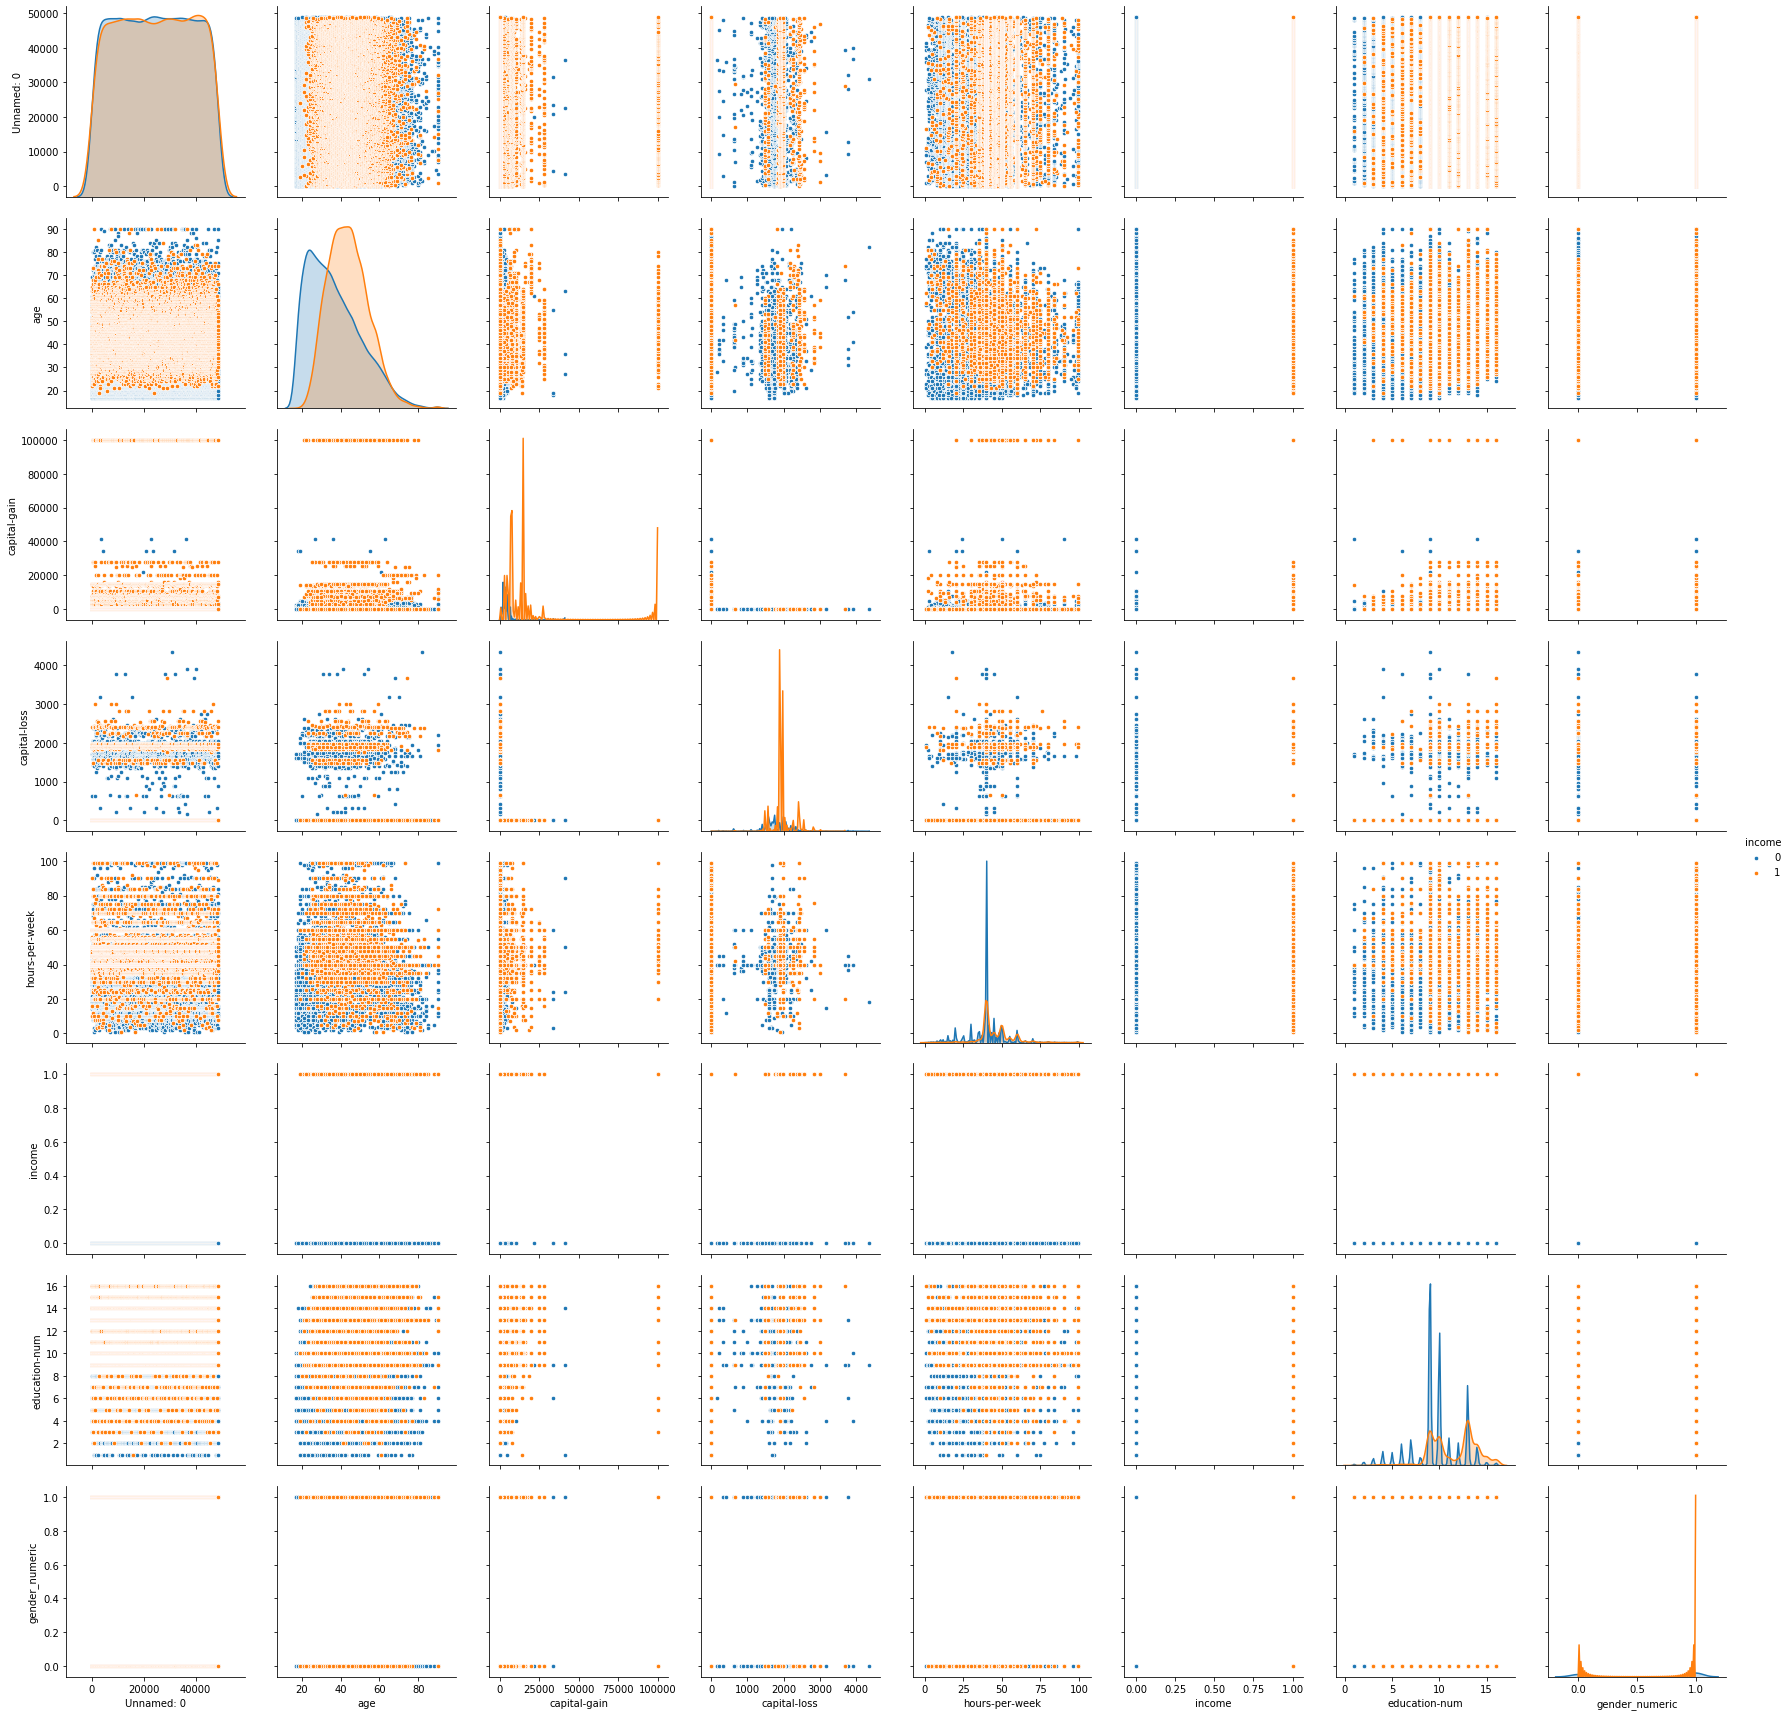

In [59]:
# PAirplot of entire dataset

sns.pairplot(income_df, hue = 'income', height=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )

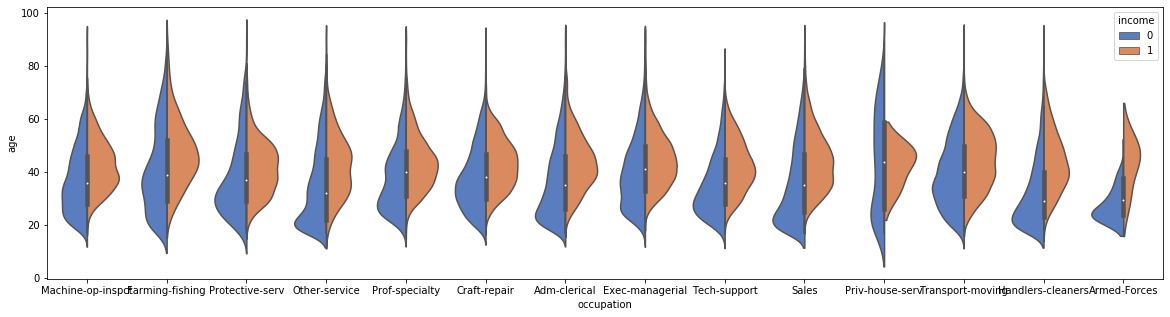

In [60]:
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="occupation", y="age", hue="income",
                    data=income_df, gridsize=100, palette="muted", split=True)

#### The general trend is that more senior workers have higher salaries. Armed-forces don't have a high job salaries.

#### It is also evident that the private housing have most age variation but the income range for the variation is still nominal means there is not much income in it.

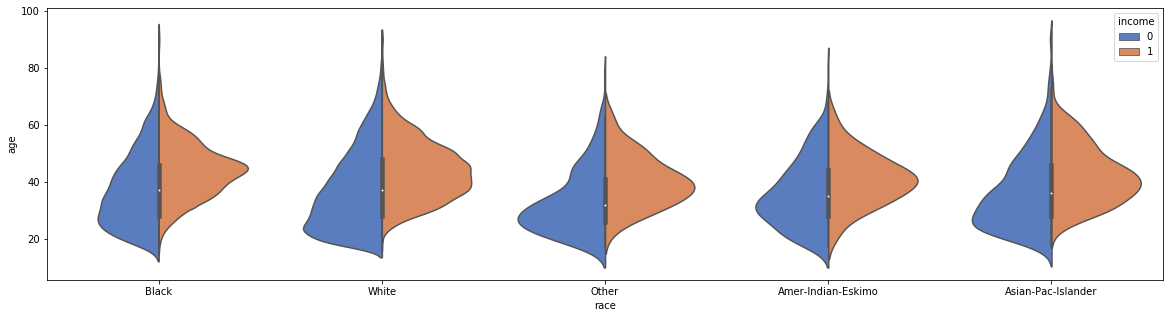

In [61]:
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="race", y="age", hue="income",
                    data=income_df, gridsize=100, palette="muted", split=True, saturation=0.75)

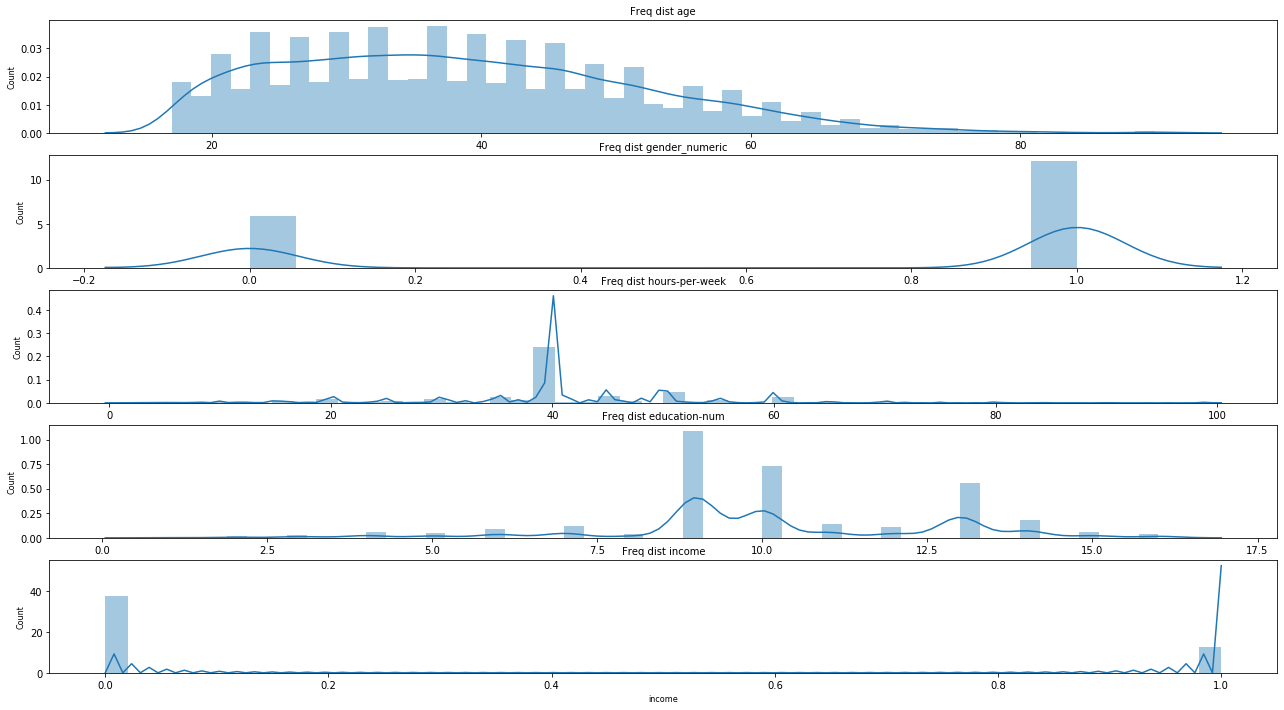

In [62]:
col_names = ['age', 'gender_numeric', 'hours-per-week', 'education-num', 'income']

fig, ax = plt.subplots(len(col_names), figsize=(22,12))

for i, col_val in enumerate(col_names):

    sns.distplot(income_df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

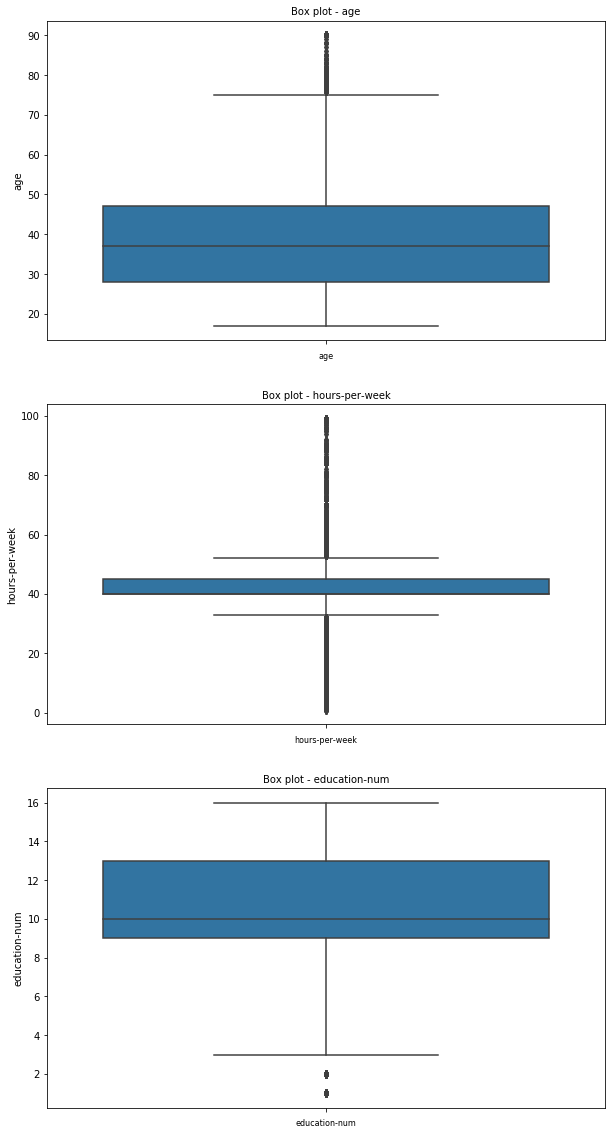

In [63]:
col_names = ['age', 'hours-per-week', 'education-num']

fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=income_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

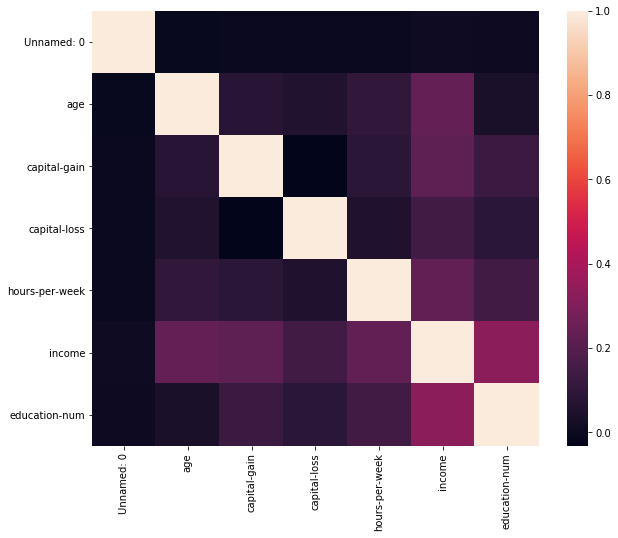

In [64]:

_, ax = plt.subplots(figsize=(10, 8))
corr = income_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 3.Apply Machine Learning Models in our cleaned dataset

In [65]:
my_df = pd.read_csv('modified-adult-data.csv')

In [66]:

my_df.head()

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0,7
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0,9
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1,12
3,3,44,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1,10
4,5,34,Private,Never-married,Other-service,White,Male,0,0,30,United-States,0,6


In [67]:
drop_elements = ['education-num', 'native-country', 'income']
y = my_df['income']
X = my_df.drop(drop_elements, axis=1)

In [68]:

X.head()

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40
3,3,44,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40
4,5,34,Private,Never-married,Other-service,White,Male,0,0,30


In [69]:
drop_elements = ['workclass', 'marital-status', 'occupation', 'race', 'native-country', 'income']
X = my_df.drop(drop_elements, axis=1)
X.head()

,Unnamed: 0,age,gender,capital-gain,capital-loss,hours-per-week,education-num
0,0,25,Male,0,0,40,7
1,1,38,Male,0,0,50,9
2,2,28,Male,0,0,40,12
3,3,44,Male,7688,0,40,10
4,5,34,Male,0,0,30,6


In [70]:
X['gender_numeric'] = np.where(X['gender'] == 'Male', 1, np.where(X['gender'] == 'Female', 0, X['gender']))
del X['gender']
X.head()

,Unnamed: 0,age,capital-gain,capital-loss,hours-per-week,education-num,gender_numeric
0,0,25,0,0,40,7,1
1,1,38,0,0,50,9,1
2,2,28,0,0,40,12,1
3,3,44,7688,0,40,10,1
4,5,34,0,0,30,6,1


In [71]:

del X['Unnamed: 0']

In [72]:
X.head()

,age,capital-gain,capital-loss,hours-per-week,education-num,gender_numeric
0,25,0,0,40,7,1
1,38,0,0,50,9,1
2,28,0,0,40,12,1
3,44,7688,0,40,10,1
4,34,0,0,30,6,1


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [74]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [75]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Model is 0.819126589275843


In [76]:
from sklearn.naive_bayes import GaussianNB #Naive bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.7868435599778884


In [77]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 0.8163626312880045


In [78]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.8211166390270868


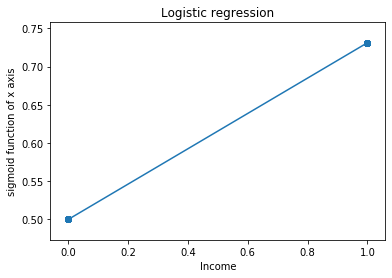

In [79]:
drop_elements = ['education-num', 'native-country']
y = my_df['income']
X = my_df.drop(drop_elements, axis=1)
y=X['income']
z = 1/(1 + np.exp(-y))
plt.scatter(y,z)
plt.xlabel("Income")
plt.ylabel("sigmoid function of x axis")
plt.title("Logistic regression")
plt.plot(y,z)
plt.show()

### Confusion Matrix

Text(33.0, 0.5, 'Actual classes')

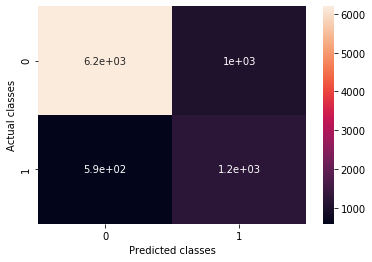

In [80]:
cfm=confusion_matrix(y_pred, y_test)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

### Comparison Graph

C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

LR: 0.815100 (0.009049)


C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mukund Rastogi\anaconda\lib\site-pa

RF: 0.807600 (0.007255)
KNN: 0.816100 (0.012103)
NB: 0.790600 (0.016681)


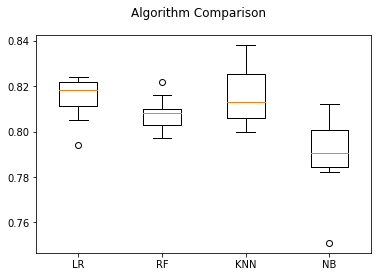

In [81]:
# load dataset
from sklearn import model_selection
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
XX_train = X_train[:10000]
Y_train = y_train[:10000]
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, XX_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()